## Exploratory Data Analysis (EDA) 

In [1]:
# importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('shopping mall dataset.csv')

In [3]:
# first some rows
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [4]:
# last rows
df.tail()

,Customer ID,Age,Gender,Annual Income,Spending Score
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5
15078,b8b8f561-ebca-4401-8afe-544c906554ba,19,Male,78045,2


In [5]:
# smaple rows
df.sample(10)

,Customer ID,Age,Gender,Annual Income,Spending Score
5729,dcfa1029-e292-4ebc-aedb-a13702ca9b90,57,Female,190138,34
4068,bc161a12-07b6-4c09-b93d-df8f4fc565e3,70,Female,38599,63
13098,d8e45483-cff9-4b08-81db-5c2ceaba1598,57,Female,119095,77
4522,58df38cb-956d-409b-9cff-cabeae3e8502,52,Female,142234,33
14335,bf90967d-e9bb-4238-a3cc-7a831911f021,84,Male,124853,66
9188,9607c24a-9660-4b0e-b302-eb3ad41a2d0b,34,Male,58327,31
6618,0e46751b-5fca-486c-8cbd-d307b53f14d3,47,Female,133351,58
6332,5eb8f48d-4cdd-40fb-a6dc-39f746829224,83,Male,130318,14
7585,ba590833-3ae8-498f-9747-04dde2bbe7b0,44,Male,27291,46
6794,bc180328-0eba-4111-8278-859e5b7a2812,57,Male,59849,64


In [6]:
# shape of the dataset
df.shape

(15079, 5)

In [7]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.1+ KB


In [8]:
# Summary Statistics
df.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [9]:
# Check for Duplicates
df.duplicated().sum()

np.int64(0)

## EDA Graphs

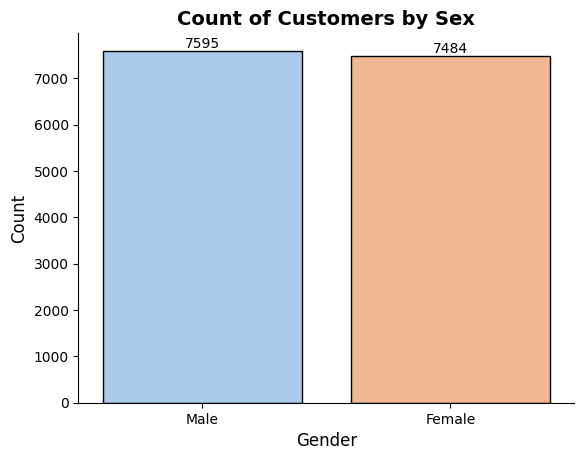

In [10]:
# chat for the sex 
ax = sns.countplot(x='Gender', data=df, palette='pastel', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

ax.set_title('Count of Customers by Sex', fontsize=14, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
sns.despine()
plt.show()

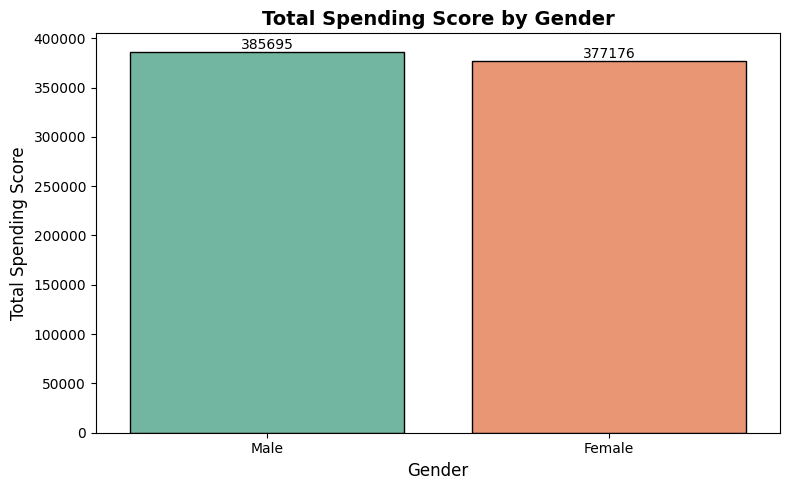

In [11]:
spending_by_gender = df.groupby('Gender', as_index=False)['Spending Score'].sum().sort_values(by='Spending Score', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Gender', y='Spending Score', data=spending_by_gender, palette='Set2', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

ax.set_title('Total Spending Score by Gender', fontsize=14, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Total Spending Score', fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
## making the age group column from the age column 
def create_age_groups(df, age_column='Age'):
    bins = range(0, 101, 10)  
    labels = [f'{i}-{i+10}' for i in bins[:-1]]  
    df['Age_Group'] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df

In [13]:
df = create_age_groups(df , age_column='Age')

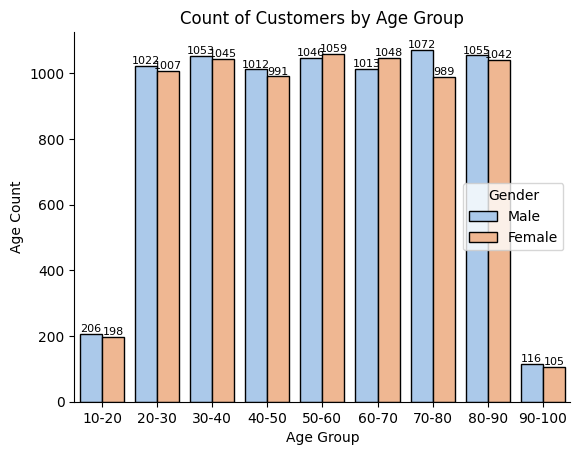

In [14]:
ax1 = sns.countplot(x='Age_Group', data=df, palette='pastel', edgecolor='black', hue="Gender", order=sorted(df['Age_Group'].unique()), dodge=True)
for c in ax1.containers:
    ax1.bar_label(c, fmt='%d', label_type='edge', fontsize=8, color='black')
ax1.set(title='Count of Customers by Age Group', xlabel='Age Group', ylabel='Age Count')
sns.despine()
plt.show()


Text(0, 0.5, 'Spending Score')

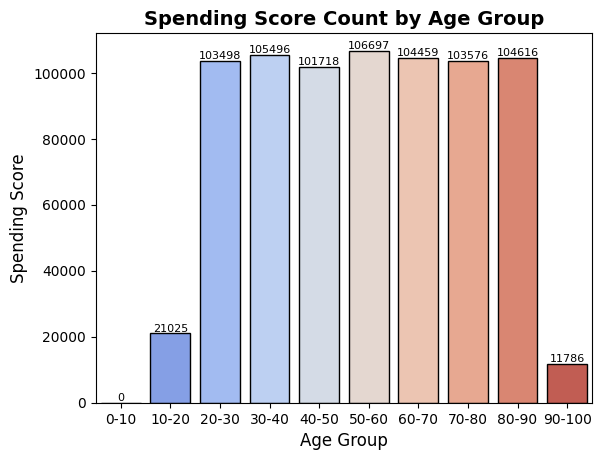

In [15]:
### spending score  vs agegroup
death_rate_age = df.groupby(['Age_Group'] , as_index=False)['Spending Score'].sum().sort_values(by='Spending Score' , ascending=False)

ax = sns.barplot(x = 'Age_Group' , y = 'Spending Score' , data=death_rate_age , palette='coolwarm', edgecolor='black')
for container in ax.containers:  
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black')
    
ax.set_title('Spending Score Count by Age Group', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=12)  
ax.set_ylabel('Spending Score', fontsize=12)

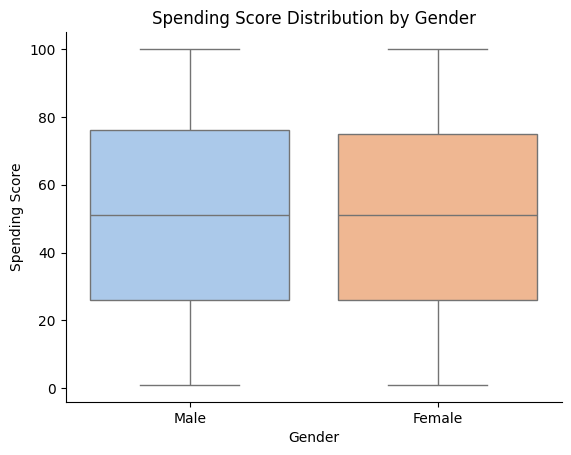

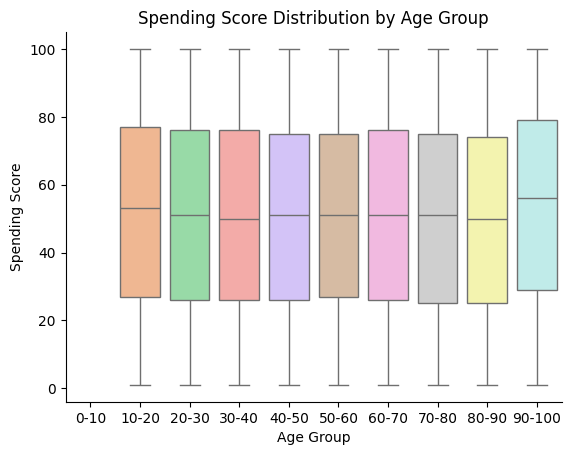

In [16]:
sns.boxplot(x='Gender', y='Spending Score', data=df, palette='pastel')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
sns.despine()
plt.show()

sns.boxplot(x='Age_Group', y='Spending Score', data=df, palette='pastel')
plt.title('Spending Score Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
sns.despine()
plt.show()

## MODEL TRANING!

In [41]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [42]:
df = df.drop(columns=['Customer ID'] , axis=1)

In [43]:
df.head()

,Age,Gender,Annual Income,Spending Score
0,30,Male,151479,89
1,58,Female,185088,95
2,62,Female,70912,76
3,23,Male,55460,57
4,24,Male,153752,76


In [44]:
# canging the text data into the numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [45]:
df.head()

,Age,Gender,Annual Income,Spending Score
0,30,1,151479,89
1,58,0,185088,95
2,62,0,70912,76
3,23,1,55460,57
4,24,1,153752,76


In [46]:
# just traking the three main cilumns ----- Age , Annual income and spending score 
df = df[["Age","Annual Income","Spending Score"]]

In [47]:
df.head(3)

,Age,Annual Income,Spending Score
0,30,151479,89
1,58,185088,95
2,62,70912,76


In [48]:
# scale the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sacled_data = scaler.fit_transform(df)

In [49]:
from sklearn.cluster import KMeans

#elbow methods 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i  , random_state=42)
    kmeans.fit(sacled_data)
    wcss.append(kmeans.inertia_)

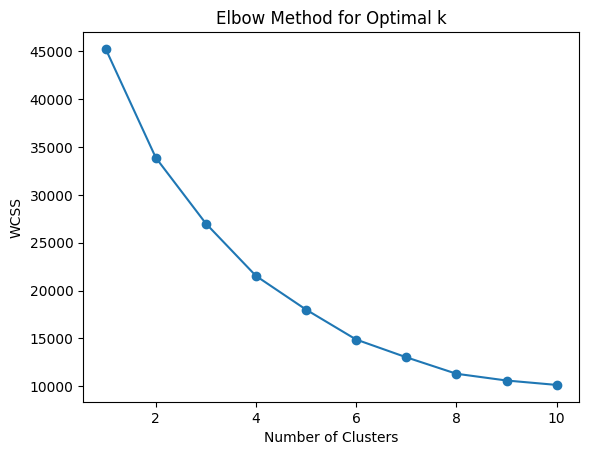

In [50]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(sacled_data)

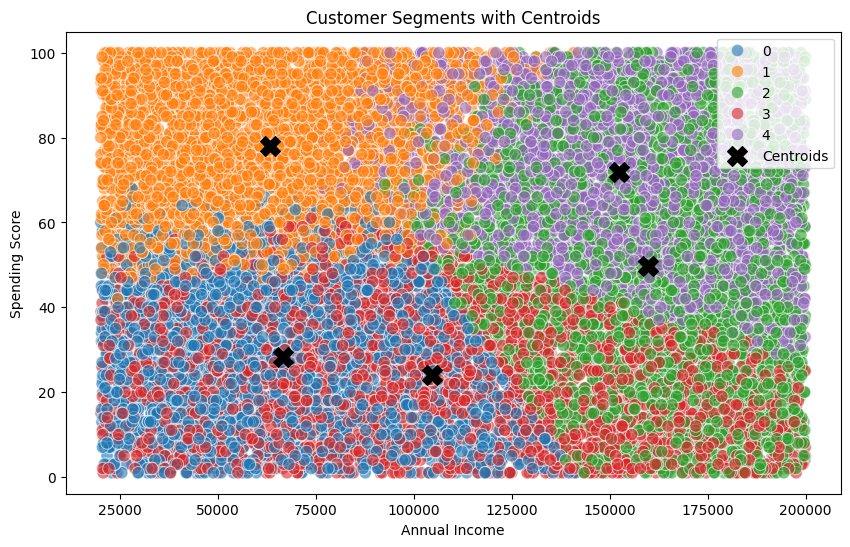

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='tab10', s=80, alpha=0.6)
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], c='black', s=200, marker='X', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [54]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

               Age  Annual Income  Spending Score
Cluster                                          
0        36.815013   66569.745691       28.275756
1        53.059369   63059.945269       78.077922
2        34.999085  159650.847561       49.609451
3        74.021040  104864.337562       24.062809
4        71.786921  152273.000735       72.023880


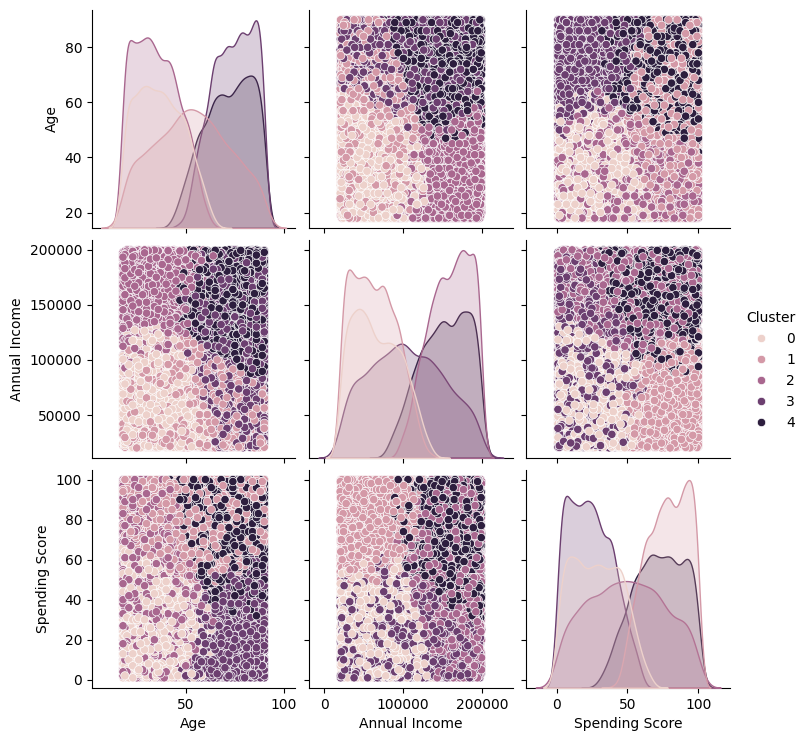

In [55]:
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income', 'Spending Score'])
plt.show()

## Hierarchical Clustering

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [63]:
# Create linkage matrix using Ward's method
linkage_matrix = linkage(sacled_data, method='ward')

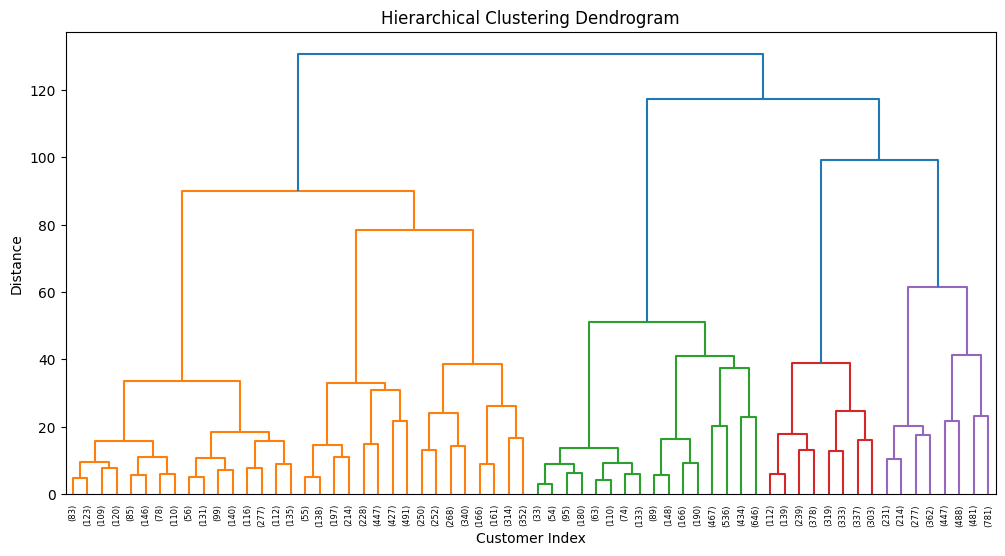

In [64]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [65]:
df['Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

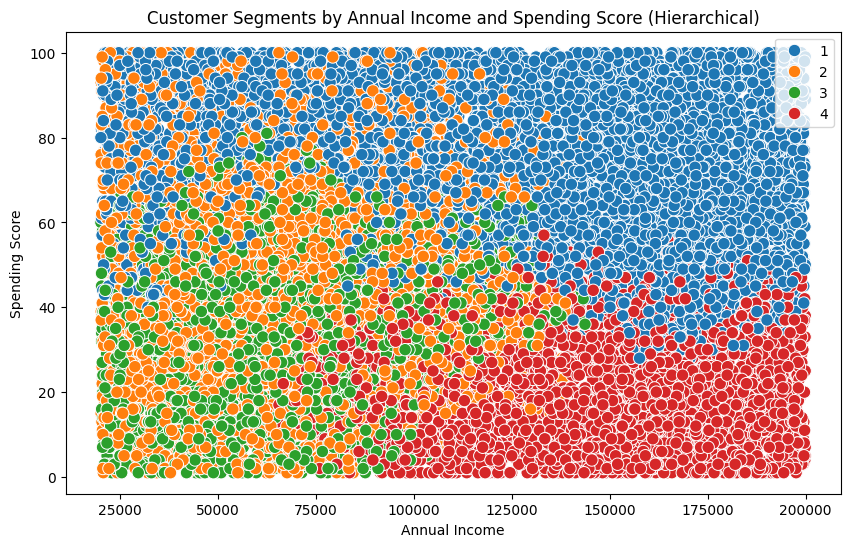

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='tab10', s=80)
plt.title('Customer Segments by Annual Income and Spending Score (Hierarchical)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()